**Modifications to classical least squares regression**

One way to improve on least squares is via **ridge regression**.

One way to understand the motivation behind ridge regression is to think of using Bayesian inference for the model coeffients.

Letting the row-vectors of our design matrix be denoted by $x^{(i)}$ for $i=1,\ldots,N$ our typical regression model assumptions state that

$$
Y_i = x^{(i)t}\beta + e_i,~\mbox{ for } i=1,\ldots,N,
$$

where 
- $\beta$ is an unknown $k$-vector,
- the $e_i$ are independent $N(0,\sigma^2)$ 
- $\sigma>0$ is unknown.

The likelihood function then takes the form

$$
L(\beta,\sigma) = \prod_{i=1}^N {1\over \sqrt{2\pi} \sigma} \exp 
\left\{ -\frac{1}{2} \left(\frac{Y_i - x^{(i)t} \beta}{\sigma} \right)^2\right\}
$$

Maximizing in $\beta$ leads to the least squares criterion for finding $\beta.$

$$
\hat{\beta} = \arg\min_{\beta} \sum_{i=1}^N (Y_i - x^{(i)t} \beta)^2
$$

On the other hand, if takea Bayesian point of view, maybe we have a prior probability distribution for $\beta.$
A simple example would be to assume that the components of $\beta$ are iid $N(0,\tau^2)$ for some value of $\tau,$ so our prior density takes the form

$$
\prod_{j=1}^k {1\over \sqrt{2\pi} \tau} \exp 
\left\{ -\frac{1}{2} \frac{\beta_j^2}{\tau^2} \right\}
$$
Then our posterior distribution would be proportional to 

$$
L(\beta,\sigma) = \prod_{i=1}^N {1\over \sqrt{2\pi} \sigma} \exp 
\left\{ -\frac{1}{2} \left(\frac{Y_i - x^{(i)t} \beta}{\sigma} \right)^2\right\}\prod_{j=1}^k {1\over \sqrt{2\pi} \tau} \exp 
\left\{ -\frac{1}{2} \frac{\beta_j^2}{\tau^2} \right\}
$$

and maximizing this with respect to $\beta$ leads to minimizing an expression of the form

$$
\sum_{i=1}^N (Y_i - x^{(i)t} \beta)^2 +  \alpha\parallel \beta \parallel^2
$$

for some constant $\alpha.$ This is what is done in ridge regression. 

The second term is called a *penalty* term as it penalizes large values of $\beta$ in terms of the squared Euclidean norm.

A *best* choice of $\alpha$ can be found using our second training set.



In [5]:
import pandas as pd
import numpy as np
import datetime
import os
import mylib as my

from sklearn.linear_model import LinearRegression

os.chdir(my.onedrive+"//CurrentCourses/553.688.Spring.2023/Lectures/April/Lecture23/")

df=pd.read_csv("TRAFFIC_VOLUME2.csv")
df.drop(columns=["Unnamed: 0","index"],inplace=True)
df.drop(columns=["snow_1h","holiday","time_diff"],inplace=True,axis=1)

Y=df.traffic_volume
df.drop(columns=["traffic_volume"],inplace=True)

weekday_dummies=pd.get_dummies(df["weekday"],drop_first=True,prefix="wday")
df=pd.concat([df,weekday_dummies],axis=1)
df.drop("weekday",axis=1,inplace=True)

weather_dummies=pd.get_dummies(df["weather_main"],prefix="W")
weather_dummies.drop("W_Clear",axis=1,inplace=True)

df=pd.concat([df,weather_dummies],axis=1)
df["holiday_ind"]=df.holiday_ind.astype(float)

hour_dummies=pd.get_dummies(df["hour"],drop_first=True,prefix="Hour")
df=pd.concat([df,hour_dummies],axis=1)

pvarnames=["temp","lrain","snowind","clouds_all"]
pvarnames+=list(weekday_dummies.columns)
pvarnames+=list(weather_dummies.columns)
pvarnames+=list(hour_dummies.columns)
pvarnames+=["holiday_ind"]

X=df.loc[:,pvarnames].values

In [6]:
N=df.shape[0] # number of rows
perm=np.random.permutation(range(N))
Itrain1=perm[0:int(N/3)]
Itrain2=perm[int(N/3):int(2*N/3)]
Itest=perm[int(2*N/3):N]

In [7]:
Xtrain1=X[Itrain1,:]
Ytrain1=Y[Itrain1]
Xtrain2=X[Itrain2,:]
Ytrain2=Y[Itrain2]
Xtest=X[Itest,:]
Ytest=Y[Itest]

In [8]:
reg3 = LinearRegression().fit(Xtrain1,Ytrain1)
Ypred3=reg3.predict(Xtrain2)
sum(abs(Ypred3-Ytrain2))/len(Ypred3)

580.3721814664287

In [11]:
from sklearn.linear_model import Ridge

alpha=np.linspace(-10,10,100)
e=np.zeros(100)
for i in range(100):
    clf = Ridge(alpha[i])
    fit = clf.fit(Xtrain1, Ytrain1)
    Ypred=fit.predict(Xtrain2)
    e[i]=sum(abs(Ypred-Ytrain2))/len(Ypred)
    i+=1


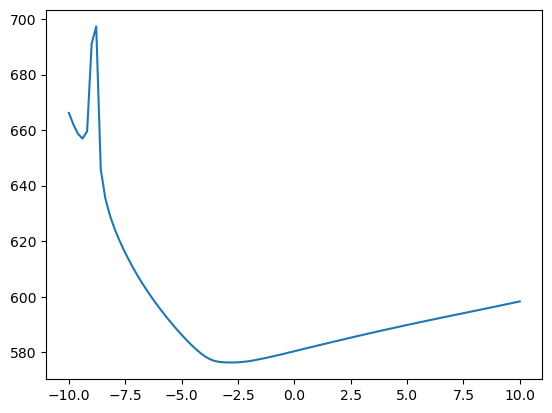

In [12]:
import matplotlib.pyplot as plt
plt.plot(alpha,e)

**Lasso regression**

Another approach is Lasso regression. Here the penalty term uses the $L_1$ norm instead of the Euclidean norm, so we attempt to minimize


$$
\sum_{i=1}^N (Y_i - x^{(i)t} \beta)^2 +  \alpha \parallel \beta \parallel_1 
$$

$$
\parallel \beta \parallel_1 = \sum_{j=1}^k \vert \beta_j \vert.
$$

One of the benefits of this approach is that it tends to produce many zero entries in the fitted vector, i.e. it can be viewed as leading to elimination of variables under consideration (we call the process of deciding which variables to include *model selection*).

C:\Users\dqnai\AppData\Local\Temp\ipykernel_20804\1578472654.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  fit = clf.fit(Xtrain1, Ytrain1)
C:\Users\dqnai\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\dqnai\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.317e+09, tolerance: 5.358e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


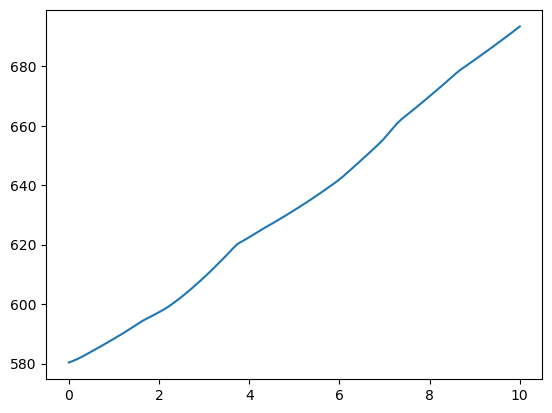

In [13]:
from sklearn.linear_model import Lasso

alpha=np.linspace(0,10,100)
e=np.zeros(100)
for i in range(100):
    clf = Lasso(alpha[i])
    fit = clf.fit(Xtrain1, Ytrain1)
    Ypred=fit.predict(Xtrain2)
    e[i]=sum(abs(Ypred-Ytrain2))/len(Ypred)
    i+=1
import matplotlib.pyplot as plt
plt.plot(alpha,e)